In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist

In [2]:
file_path = 'EastWestAirlines.xlsx'
excel_file = pd.ExcelFile(file_path)

In [3]:
df = pd.read_excel(excel_file, sheet_name='data')

In [6]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
#  1: Data Preprocessing


In [4]:
# Check for missing values
df.isnull().sum()


,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [5]:
# Drop the 'ID#' column as it's not useful for clustering
df_cleaned = df.drop(columns=['ID#'])


In [7]:
# Remove outliers using z-score (you can adjust the threshold if necessary)
from scipy.stats import zscore
z_scores = np.abs(zscore(df_cleaned))
df_cleaned = df_cleaned[(z_scores < 3).all(axis=1)]


In [8]:
# Scale the features using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned)
df_scaled = pd.DataFrame(df_scaled, columns=df_cleaned.columns)

In [ ]:
# 2: Exploratory Data Analysis (EDA)

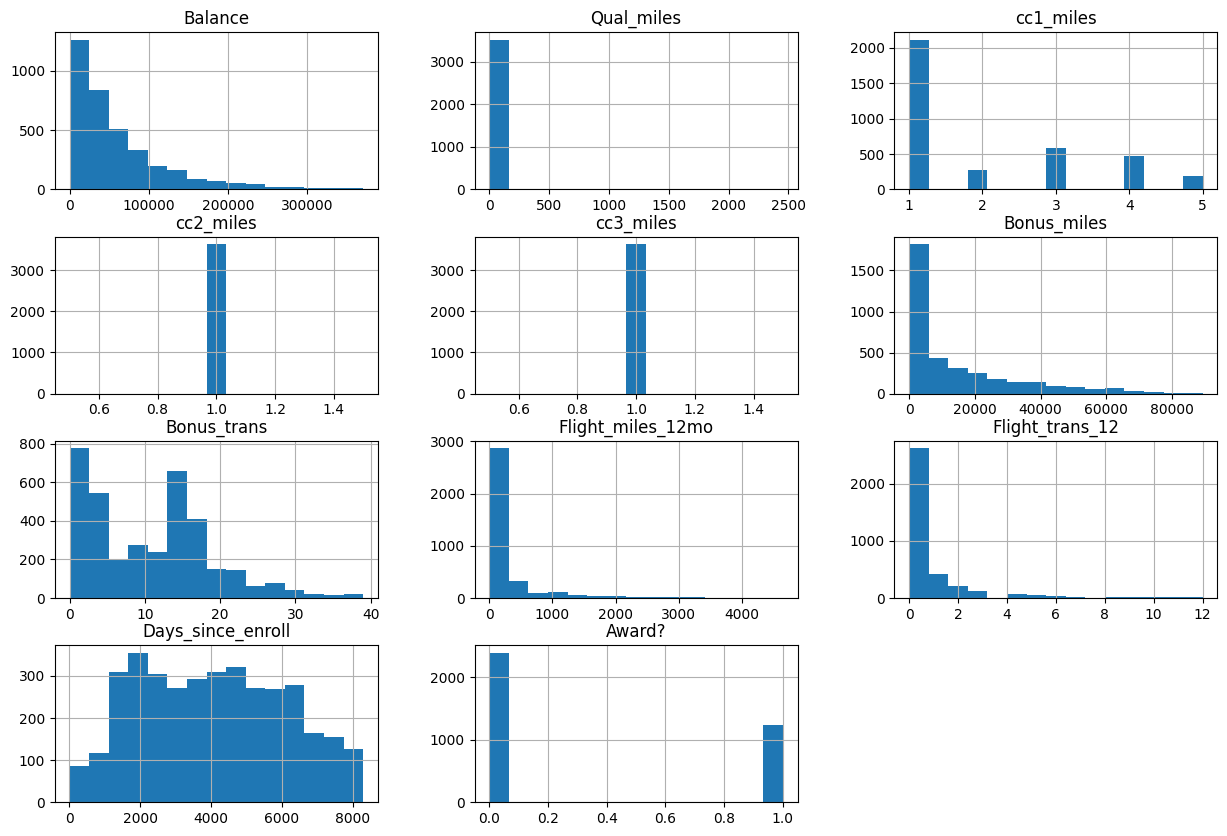

In [9]:
# Visualize distributions of features
df_cleaned.hist(bins=15, figsize=(15, 10))
plt.show()

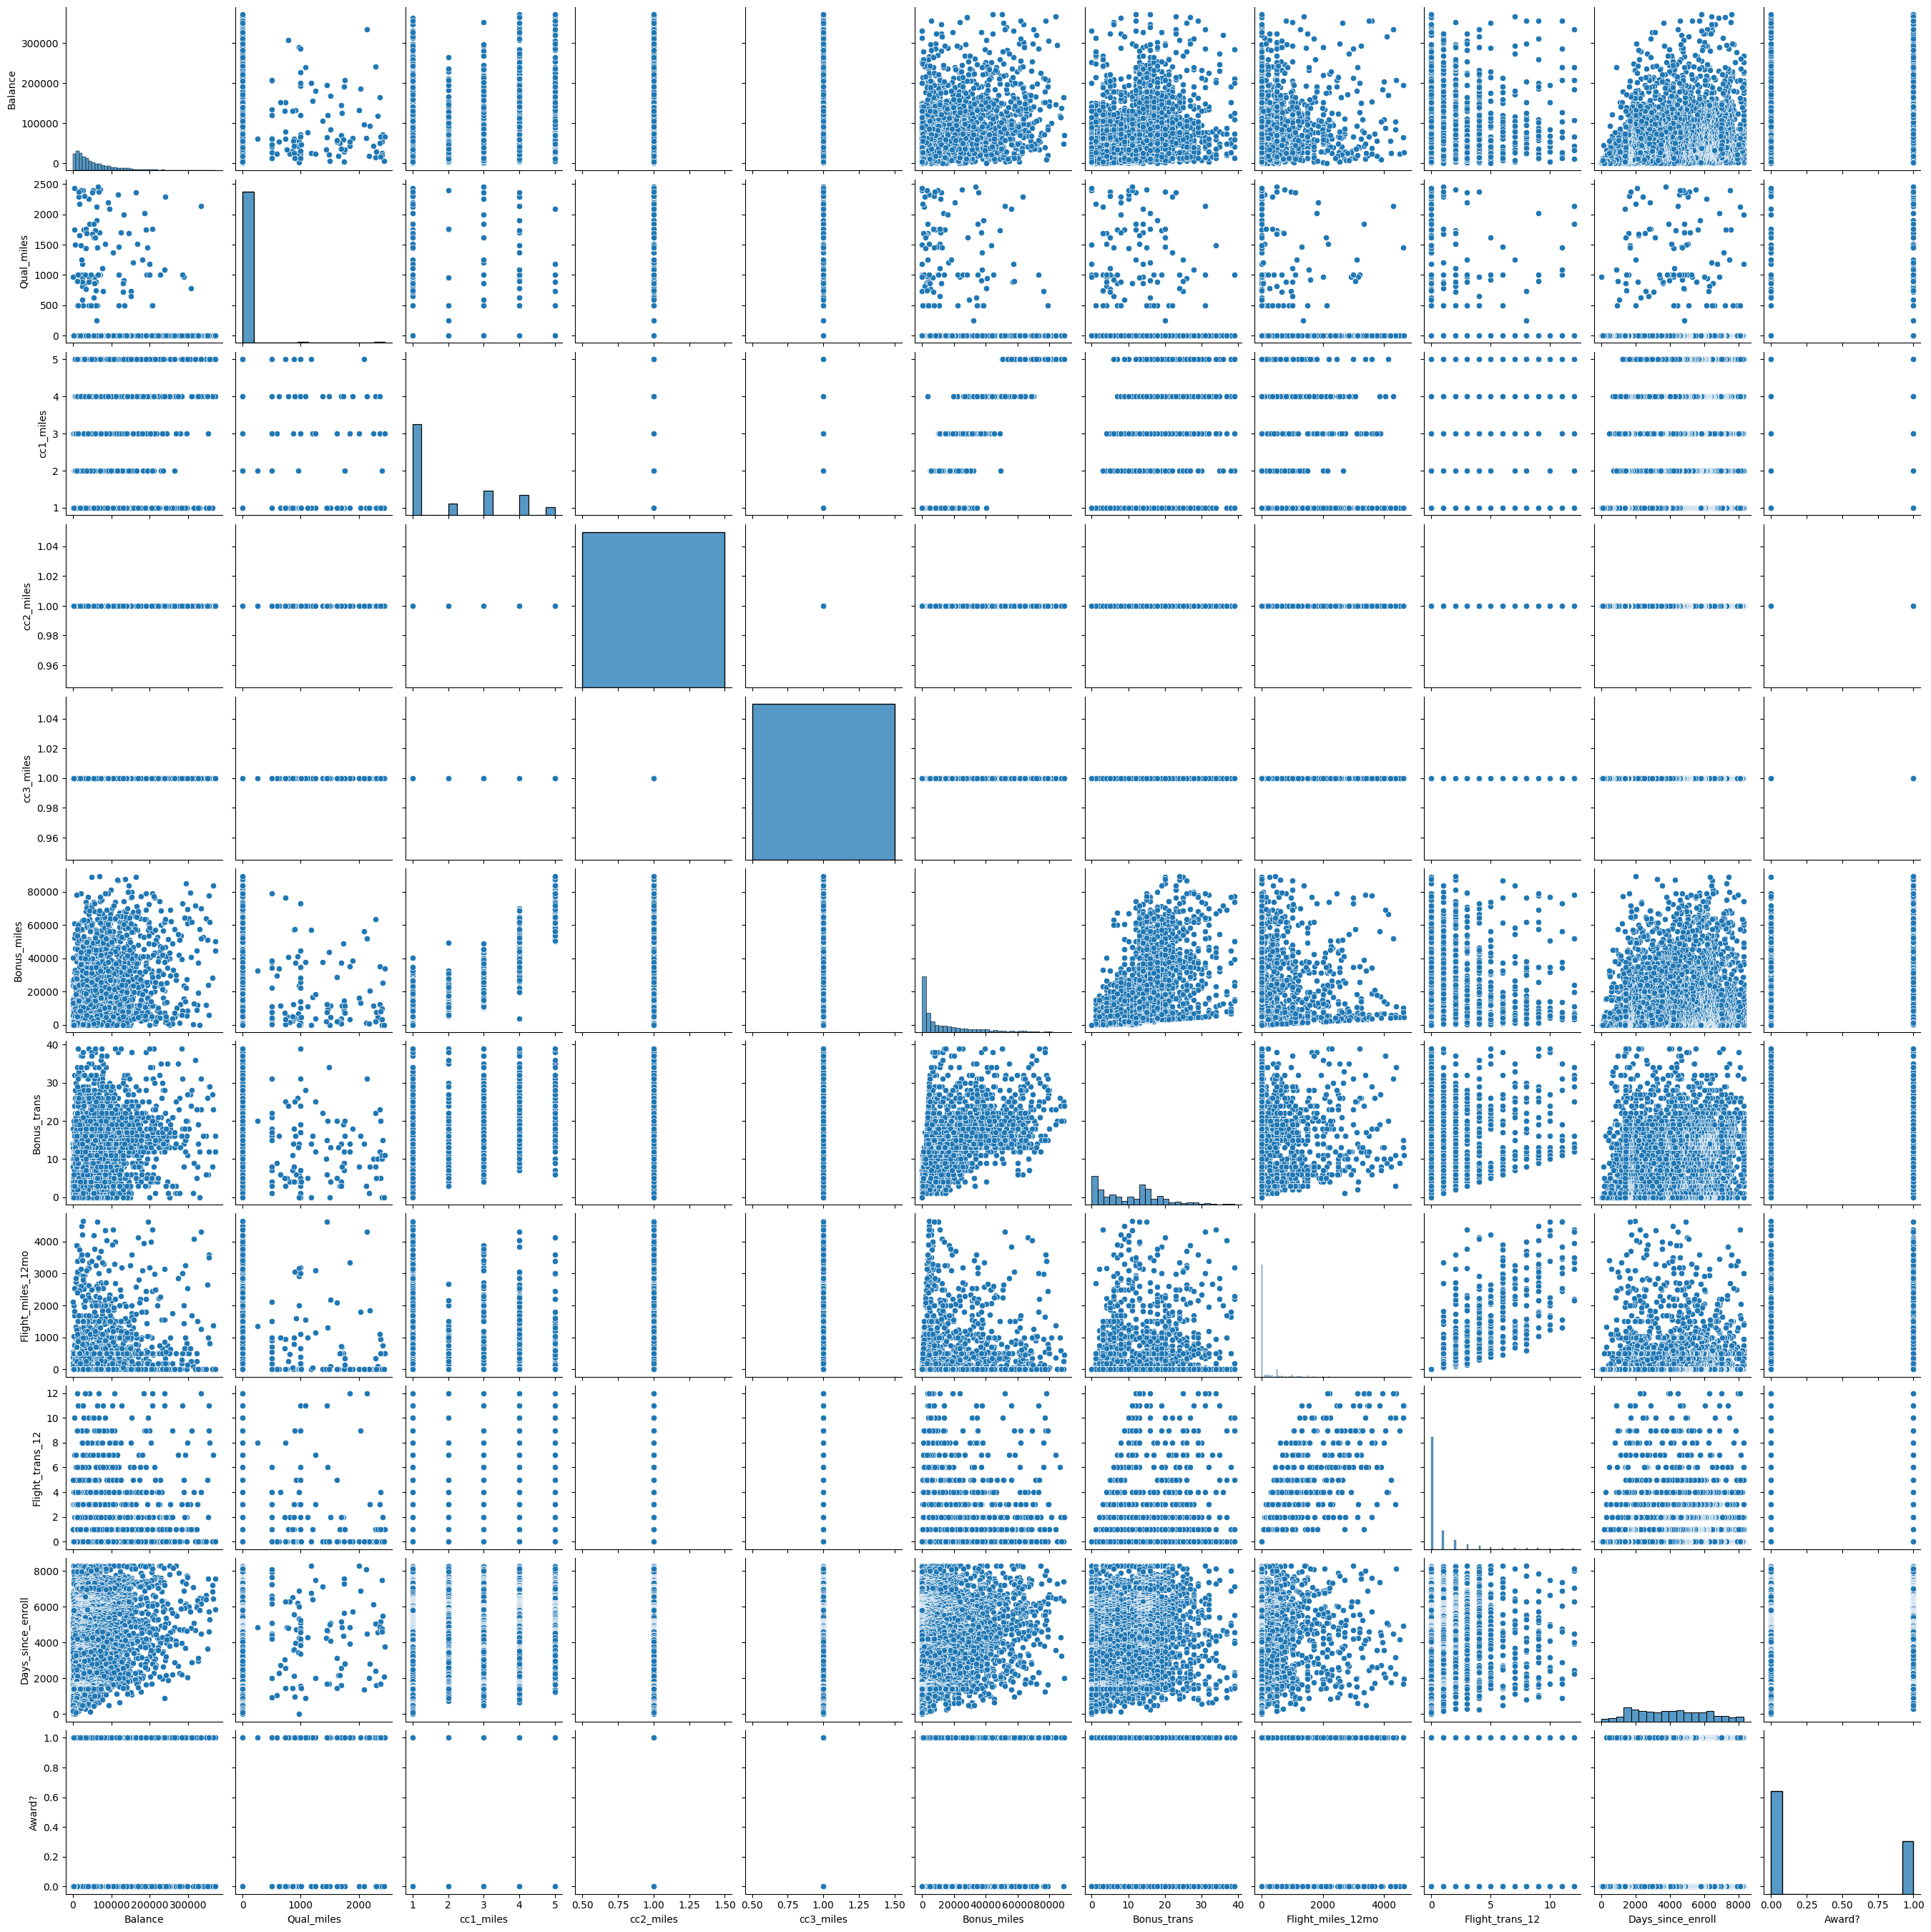

In [10]:
# Pairplot to visualize relationships between features
sns.pairplot(df_cleaned)
plt.show()

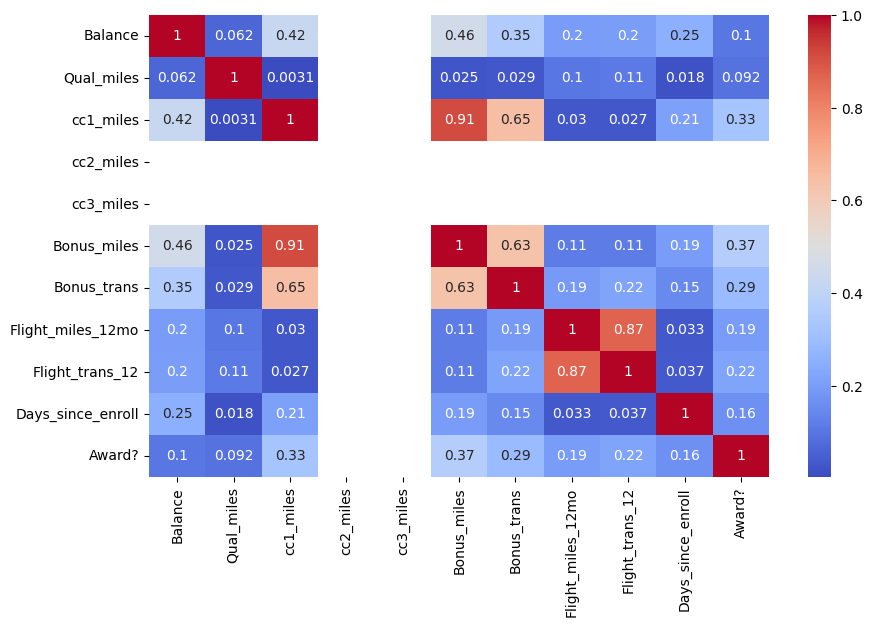

In [11]:
# Correlation heatmap to understand feature relationships
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# 3: Implement Clustering Algorithms

In [ ]:
# Using the elbow method to find the optimal number of clusters

In [12]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

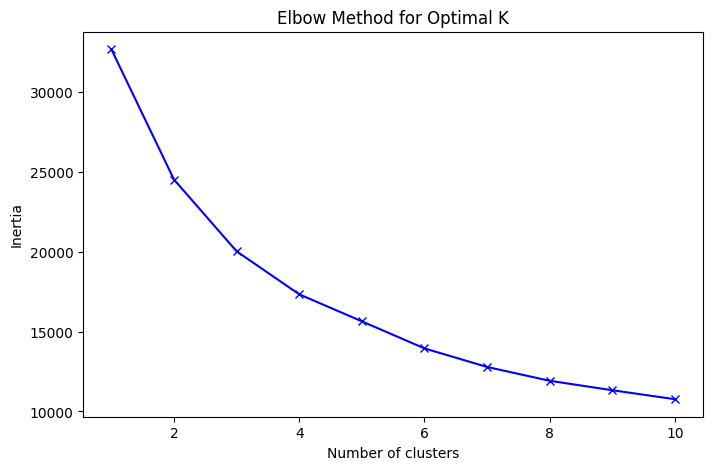

In [13]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [14]:
# Fit KMeans with the optimal number of clusters (choose based on the elbow curve)
optimal_k = 4  # Replace with the optimal K based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cleaned['KMeans_Cluster'] = kmeans.fit_predict(df_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
# Silhouette Score for KMeans
silhouette_kmeans = silhouette_score(df_scaled, df_cleaned['KMeans_Cluster'])
print(f'Silhouette Score for KMeans: {silhouette_kmeans}')

Silhouette Score for KMeans: 0.3318405287769105


In [ ]:
# Hierarchical Clustering

In [16]:
# Generate the linkage matrix
linkage_matrix = linkage(df_scaled, method='ward')


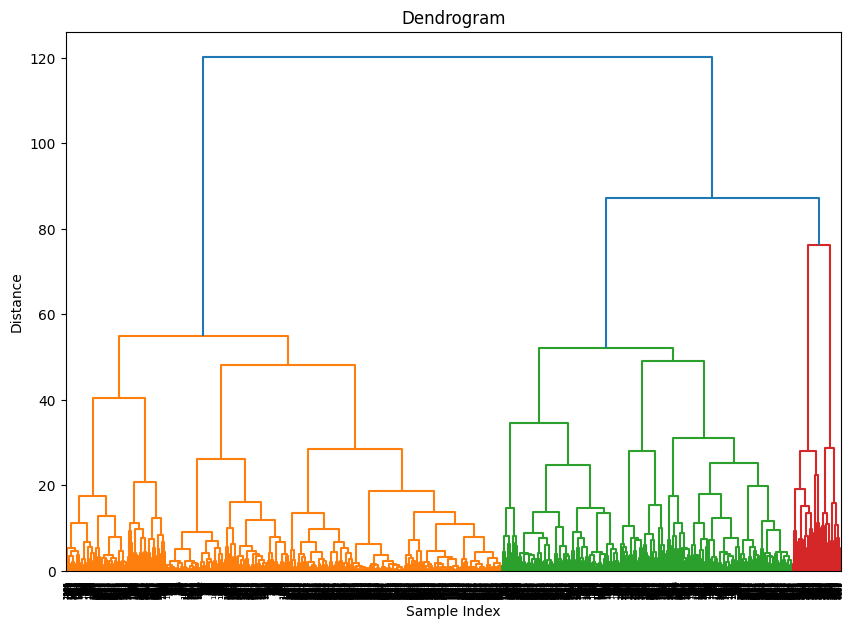

In [17]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [18]:
# Cut the dendrogram at the optimal level (choose the threshold)
threshold = 7  # This threshold can be adjusted based on the dendrogram
df_cleaned['Hierarchical_Cluster'] = fcluster(linkage_matrix, threshold, criterion='distance')


In [19]:
# Silhouette Score for Hierarchical Clustering
silhouette_hierarchical = silhouette_score(df_scaled, df_cleaned['Hierarchical_Cluster'])
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}')

Silhouette Score for Hierarchical Clustering: 0.17713356772931385


In [ ]:
# DBSCAN Clustering

In [20]:
# Fit DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust epsilon and min_samples based on data
df_cleaned['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

In [21]:
# Silhouette Score for DBSCAN (only if there are more than 1 cluster)
if len(set(df_cleaned['DBSCAN_Cluster'])) > 1:
    silhouette_dbscan = silhouette_score(df_scaled, df_cleaned['DBSCAN_Cluster'])
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
else:
    print("DBSCAN did not form clusters well with the current parameters.")

Silhouette Score for DBSCAN: -0.2868751166819865


In [ ]:
# 4: Cluster Analysis and Interpretation

In [22]:
# Analyze cluster characteristics for KMeans, Hierarchical, and DBSCAN
print(df_cleaned.groupby('KMeans_Cluster').mean())
print(df_cleaned.groupby('Hierarchical_Cluster').mean())
print(df_cleaned.groupby('DBSCAN_Cluster').mean())

                     Balance   Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
KMeans_Cluster                                                               
0               96005.461864    56.004237   2.042373        1.0        1.0   
1               37053.049579     3.188026   1.140318        1.0        1.0   
2               94773.871622     6.119932   3.544764        1.0        1.0   
3               77728.083333  1616.847222   1.847222        1.0        1.0   

                 Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
KMeans_Cluster                                                                  
0               19432.966102    16.118644        2222.381356         6.258475   
1                3555.641721     6.028531          93.839570         0.335360   
2               32679.313345    17.326858         143.653716         0.460304   
3               14244.125000    10.791667         468.708333         1.541667   

                Days_since_enroll    Award? 

In [ ]:
# 5: Visualization of Clustering Results

In [28]:
from sklearn.decomposition import PCA

In [27]:
# Reduce the dataset to 2 dimensions using PCA for better visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)


In [29]:
#  Add PCA components to the DataFrame for visualization
df_cleaned['PCA1'] = df_pca[:, 0]
df_cleaned['PCA2'] = df_pca[:, 1]


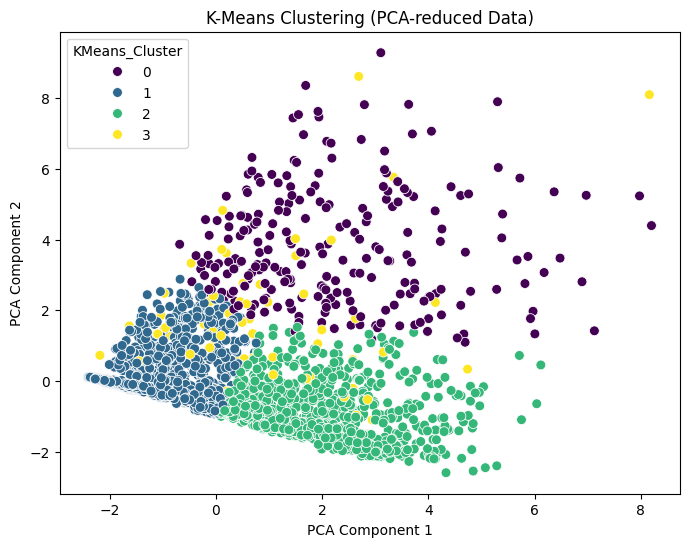

In [30]:
# Visualize K-Means clustering on the PCA-reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=df_cleaned, palette='viridis', s=50)
plt.title('K-Means Clustering (PCA-reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

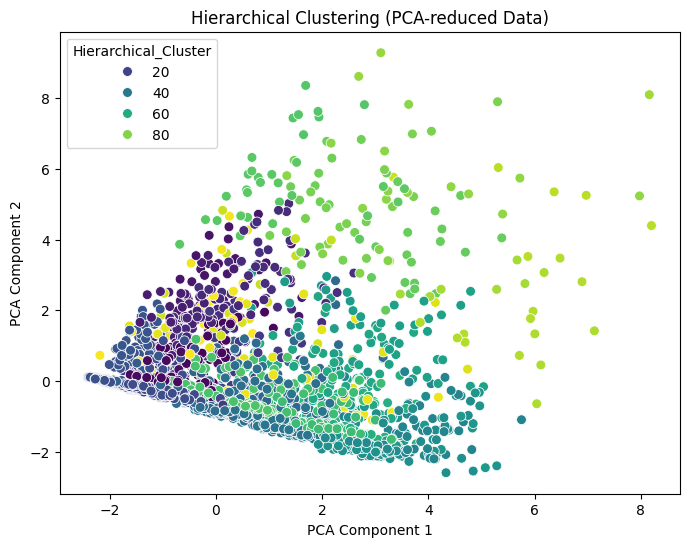

In [32]:
# Visualize Hierarchical clustering on the PCA-reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=df_cleaned, palette='viridis', s=50)
plt.title('Hierarchical Clustering (PCA-reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

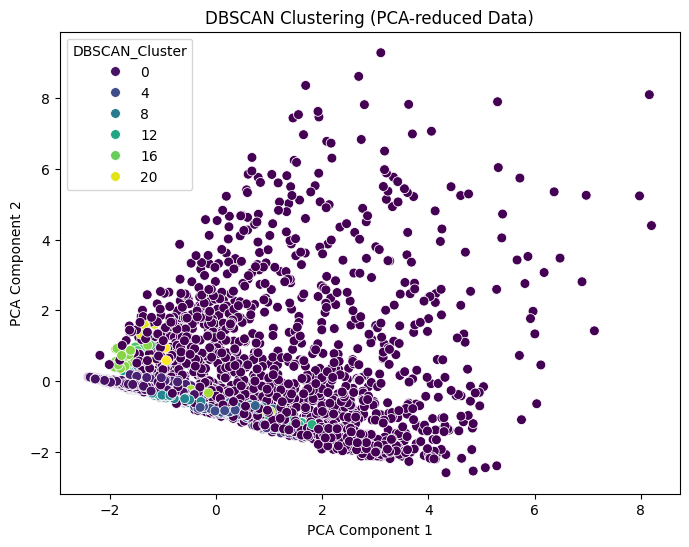

In [33]:
# Visualize DBSCAN clustering on the PCA-reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='DBSCAN_Cluster', data=df_cleaned, palette='viridis', s=50)
plt.title('DBSCAN Clustering (PCA-reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
# 6: Evaluation and Performance Metrics

In [34]:
# Silhouette Score for KMeans
print(f'Silhouette Score for KMeans: {silhouette_kmeans}')

Silhouette Score for KMeans: 0.3318405287769105


In [35]:
# Silhouette Score for Hierarchical Clustering
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical}')

Silhouette Score for Hierarchical Clustering: 0.17713356772931385


In [36]:
# Silhouette Score for DBSCAN
if len(set(df_cleaned['DBSCAN_Cluster'])) > 1:
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
else:
    print("DBSCAN did not form clusters well with the current parameters.")

Silhouette Score for DBSCAN: -0.2868751166819865


**Summary:**

**1.Preprocessing:**

Handled missing values, removed outliers, and scaled the features.

**2.EDA:**

Visualized data distributions, pairwise relationships, and correlations.

**3.Clustering Algorithms:**

Implemented K-Means, Hierarchical, and DBSCAN clustering with appropriate
parameter tuning.

**3.Cluster Analysis:**

Analyzed the clusters generated by each algorithm and interpreted the characteristics.

**3.Visualization:**

Used scatter plots to visualize the clusters generated by each algorithm.

**4.Evaluation:**

Evaluated clustering performance using the Silhouette Score.